# Basics

In [49]:
1 + 1442

1443

In [50]:
rand(2,3) * ones(3,1)

2x1 Array{Float64,2}:
 1.85021
 1.24443

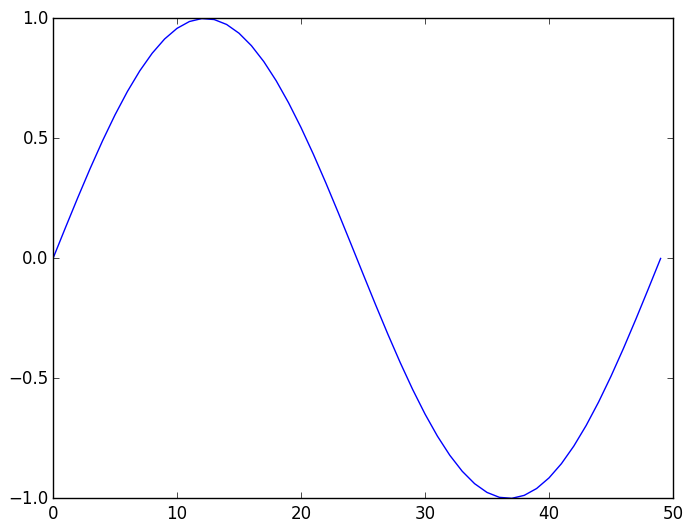

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323b29110>

In [4]:
using PyPlot
plot(a)

# Control flow - the usual suspects

In [64]:
x = false
x = 1

1

In [5]:
if false
    println("jup!")
elseif 1+1 == 2
    println("but now!")
else
    println(".")
end

while rand()<0.99 && x > 5
end

try
    error("Brrr")
catch e
    println("Got error: $e")
end

but now!
Got error: ErrorException("Brrr")


In [6]:
for x = 10:-0.1:1
end

for x in 1:10
end

for x in [1, "a"]
    @show x
end

x = 1
x = "a"


In [65]:
a = [x+y for x in 1:3, y in 1:5]

3x5 Array{Int64,2}:
 2  3  4  5  6
 3  4  5  6  7
 4  5  6  7  8

In [70]:
[x[1]+x[2] for x in zip(1:3,4:6)]

3-element Array{Int64,1}:
 5
 7
 9

# Functions / Multiple dispatch

In [1]:
function f(a,b)
    return a*b
end

f(a,b) = a*b

f (generic function with 1 method)

In [2]:
f(2,3)

6

In [3]:
methods(f)

# 1 method for generic function "f":
f(a, b) at In[1]:5

In [4]:
f(a::String,b) = repeat(a,b)
f("abc",3)

"abcabcabc"

In [5]:
methods(f)

# 2 methods for generic function "f":
f(a::AbstractString, b) at In[4]:1
f(a, b) at In[1]:5

In [79]:
function g(a::Float64, b::Int)
    println("with a asdf!")
    a*b*10
end

g (generic function with 1 method)

In [86]:
func([obj, ] param1, param2)
    obj.a = 1
end
obj.func(1, 2)

show(a::Class1,b,c)
show(a::Class2,b)



9

In [8]:
function f{T<:FloatingPoint}(a::T, b::T)
    println("with 2 floats")
    a*b
end

f (generic function with 4 methods)

In [10]:
f(1.1,2.2)

with 2 floats


2.4200000000000004

In [11]:
methods(f)

# 4 methods for generic function "f":
f(a::AbstractString, b) at In[4]:1
f(a::Float64, b::Int64) at In[6]:2
f{T<:FloatingPoint}(a::T<:FloatingPoint, b::T<:FloatingPoint) at In[8]:2
f(a, b) at In[1]:5

In [12]:
@which f("asd",1.2)

f(a::AbstractString, b) at In[4]:1

# Types

In [16]:
type StringNumber
    a
    b
end
StringNumber("abc",1)

StringNumber("abc",1)

In [17]:
StringNumber(1,1)

StringNumber(1,1)

In [18]:
type StringNumber2
    a::String
    b::Int
end
StringNumber2("Test",2)

StringNumber2("Test",2)

In [20]:
StringNumber2(1,2)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{AbstractString}, ::Int64)
This may have arisen from a call to the constructor AbstractString(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert{T<:AbstractString}(::Type{T<:AbstractString}, !Matched::AbstractArray{Char,1})
  convert{S<:AbstractString}(::Type{S<:AbstractString}, !Matched::Base.UTF8proc.GraphemeIterator{S<:AbstractString})
  ...
while loading In[20], in expression starting on line 1

In [21]:
function f(a::StringNumber2,b)
    println("StringNumber2: ", a.a, a.b)
end
x = StringNumber2("Test",10)
f(x,123)

StringNumber2: Test10


# Modules / Packages

In [ ]:
Pkg.add("JSON")
using JSON
jsonify(mydata)

Pkg.installed()
Pkg.remove("JSON")

* Available packages: [pkg.julialang.org](pkg.julialang.org)
* stored in ~/.julia/v0.3/
* Typical structure:


    ~/.julia/v0.3/StringNumbers/
      README.md 
      REQUIRE
      src/
        StringNumber.jl
      test/
        runtests.jl
    



In [ ]:
module StringNumbers

export StringNumber, show

type StringNumber{T<:Number}
    str::String
    num::T
end

function show(a::StringNumber)
    println("It's a StringNumber: $(a.str) and $(a.num)")
end

end # module

# Finding your way around

* Documention:
  * latest (0.4pre): http://docs.julialang.org/en/latest/
  * stable (0.3): http://docs.julialang.org/en/release-0.3/
* Mailing lists:
  * users: https://groups.google.com/group/julia-users
  * devs: https://groups.google.com/group/julia-dev
* Issues:
  * [Github issues](https://github.com/JuliaLang/julia/issues?q=is%3Aopen+sort%3Aupdated-desc)
* Topical overview of packages: https://github.com/svaksha/Julia.jl
* Package evaluator: http://pkg.julialang.org/

# Code generation

In [23]:
mysum(a,b) = a+b+1

mysum (generic function with 1 method)

In [25]:
@code_lowered mysum(1,1.5)

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:a,:b], Any[Any[Any[:a,:Any,0],Any[:b,:Any,0]],Any[],0,Any[]], :(begin  # In[23], line 1:
        return a + b + 1
    end))))

In [27]:
@code_typed mysum(1,1.5)

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:a,:b], Any[Any[Any[:a,Int64,0],Any[:b,Int64,0],Any[symbol("##xs#10378"),Tuple{},0]],Any[],Any[],Any[]], :(begin  # In[23], line 1:
        return (top(box))(Int64,(top(add_int))((top(box))(Int64,(top(add_int))(a::Int64,b::Int64)),1))
    end::Int64))))

In [28]:
@code_llvm mysum(1,1.5)


define double @julia_mysum_22677(i64, double) {
top:
  %2 = sitofp i64 %0 to double
  %3 = fadd double %2, %1
  %4 = fadd double %3, 1.000000e+00
  ret double %4
}


In [29]:
@code_native mysum(1,1.5)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[23]
Source line: 1
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	vcvtsi2sdq	%rdi, %xmm0, %xmm1
	vaddsd	%xmm0, %xmm1, %xmm0
	movabsq	$13199584560, %rax      ## imm = 0x312C1AD30
	vaddsd	(%rax), %xmm0, %xmm0
	popq	%rbp
	ret


In [30]:
@code_warntype mysum(1,1.5)

Variables:
  a::Int64
  b::Float64
  ##xs#10176::Tuple{}

Body:
  begin  # In[23], line 1:
      return (top(box))(Float64,(top(add_float))((top(box))(Float64,(top(add_float))((top(box))(Float64,(top(sitofp))(Float64,a::Int64)),b::Float64)),(top(box))(Float64,(top(sitofp))(Float64,1))))
  end::Float64


In [106]:
function f(a,b)
    r = zero(a)
    @inbounds for i = 1:length(a)
        r[i] = a[i]+b[i]
    end
end
data = rand(Float32, 1000000000)
f(data,data)
@time f(data,data)


   2.425 seconds      (6 allocations: 3815 MB, 11.61% gc time)


In [102]:
data = rand(Float32,10)
@code_native f(data,data)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[101]
Source line: 2
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 2
	pushq	%r14
	pushq	%rbx
	subq	$32, %rsp
	movq	$4, -48(%rbp)
	movabsq	$jl_pgcstack, %rax
	movq	(%rax), %rcx
	movq	%rcx, -40(%rbp)
	leaq	-48(%rbp), %rcx
	movq	%rcx, (%rax)
	vxorps	%xmm0, %xmm0, %xmm0
	vmovups	%xmm0, -32(%rbp)
	movq	(%rsi), %rbx
	movq	8(%rsi), %r14
Source line: 2
	movq	24(%rbx), %rsi
	movabsq	$jl_alloc_array_1d, %rax
	movabsq	$4380686896, %rcx       ## imm = 0x1051BFA30
	movq	%rcx, -24(%rbp)
	movabsq	$4380686896, %rdi       ## imm = 0x1051BFA30
	callq	*%rax
	movabsq	$13194014800, %rcx      ## imm = 0x3126CB050
	movq	%rax, -24(%rbp)
	movq	%rax, %rdi
	vxorps	%xmm0, %xmm0, %xmm0
	callq	*%rcx
	movq	%rax, %rsi
	xorl	%eax, %eax
	movq	%rsi, -32(%rbp)
Source line: 65
	movq	8(%rbx), %rcx
	testq	%rcx, %rcx
	cmovnsq	%rcx, %rax
Source line: 67
	cmpq	$1, %rax
	leaq	-1(%rax), %rax
	jo	L534
	leaq	1(%rax), %rcx
	addq	$1, %rax
	jo	L534
	testq	%rcx, %rcx
	jle	L495


In [31]:
function mysum2(a,b)
    r = 0
    r += a
    r += b
    r += 1
    r
end

mysum2 (generic function with 1 method)

In [32]:
@code_warntype mysum2(1,1.5)

Variables:
  a::Int64
  b::Float64
  r::ANY

Body:
  begin  # In[31], line 2:
      r = 0 # line 3:
      r = (top(box))(Int64,(top(add_int))(r::Int64,a::Int64)) # line 4:
      r = (top(box))(Float64,(top(add_float))((top(box))(Float64,(top(sitofp))(Float64,r::Int64)),b::Float64)) # line 5:
      r = (top(box))(Float64,(top(add_float))(r::Float64,(top(box))(Float64,(top(sitofp))(Float64,1)))) # line 6:
      return r::Float64
  end::Float64


# Parallel computing

In [107]:
addprocs(3)

3-element Array{Int64,1}:
 5
 6
 7

In [109]:
workers()

6-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7

In [47]:
@time map(x->svd(rand(1000,x)),200:210);

   1.515 seconds      (331 allocations: 74823 KB, 5.17% gc time)


In [48]:
@time pmap(x->svd(rand(1000,x)), 200:210);

 634.842 milliseconds (4456 allocations: 21492 KB, 0.22% gc time)


In [113]:
r = @fetch 1+1

2

In [112]:
fetch(r)

2